# Começando o Trabalho
---

## Apache Spark - Introdução

### [Apache Spark](https://spark.apache.org/)

Apache Spark é uma plataforma de computação em *cluster* que fornece uma API para programação distribuída para processamento de dados em larga escala, semelhante ao modelo *MapReduce*, mas projetada para ser rápida para consultas interativas e algoritmos iterativos.

O Spark permite que você distribua dados e tarefas em clusters com vários nós. Imagine cada nó como um computador separado. A divisão dos dados torna mais fácil o trabalho com conjuntos de dados muito grandes porque cada nó funciona processa apenas uma parte parte do volume total de dados.

O Spark é amplamente utilizado em projetos analíticos nas seguintes frentes:

- Preparação de dados
- Modelos de machine learning
- Análise de dados em tempo real

### [PySpark](https://spark.apache.org/docs/3.1.2/api/python/index.html)

PySpark é uma interface para Apache Spark em Python. Ele não apenas permite que você escreva aplicativos Spark usando APIs Python, mas também fornece o *shell* PySpark para analisar interativamente seus dados em um ambiente distribuído. O PySpark oferece suporte à maioria dos recursos do Spark, como Spark SQL, DataFrame, Streaming, MLlib (Machine Learning) e Spark Core.

<center><img src="https://caelum-online-public.s3.amazonaws.com/2273-introducao-spark/01/img-001.png"/></center>

#### Spark SQL e DataFrame

Spark SQL é um módulo Spark para processamento de dados estruturados. Ele fornece uma abstração de programação chamada DataFrame e também pode atuar como mecanismo de consulta SQL distribuído.

#### Spark Streaming

Executando em cima do Spark, o recurso de *streaming* no Apache Spark possibilita o uso de poderosas aplicações interativas e analíticas em *streaming* e dados históricos, enquanto herda a facilidade de uso do Spark e as características de tolerância a falhas.

#### Spark MLlib

Construído sobre o Spark, MLlib é uma biblioteca de aprendizado de máquina escalonável que fornece um conjunto uniforme de APIs de alto nível que ajudam os usuários a criar e ajustar *pipelines* de aprendizado de máquina práticos.

#### Spark Core

Spark Core é o mecanismo de execução geral subjacente para a plataforma Spark sobre o qual todas as outras funcionalidades são construídas. Ele fornece um RDD (*Resilient Distributed Dataset*) e recursos de computação na memória.

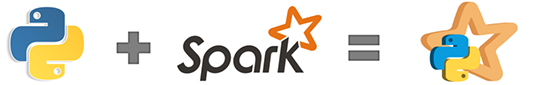

## Utilizando o Spark no Windows



[fonte](https://spark.apache.org/docs/3.1.2/api/python/getting_started/install.html)

#### Passo 1 - Instalando o Java

O PySpark requer a instalação do Java na versão 7 ou superior. Obtenha a versão mais recente clicando [aqui](https://www.java.com/pt-BR/download/). Para verificar a versão que está instalada em sua máquina execute a seguinte linha de código no seu *prompt*:

```
java -version
```

#### Passo 2 - Instalando o Python

O Python deve ser instalado em sua versão 2.6 ou superior. Para obter a versão mais recente clique [aqui](https://www.python.org/downloads/windows/). Para verificar a versão do Python que está instalada em sua máquina digite o seguinte comando em seu *prompt*:

```
python --version
```

#### Passo 3 - Instalando o Apache Spark

Selecione a versão mais estável clicando [aqui](http://spark.apache.org/downloads.html). Na criação deste projeto utilizamos a versão do Spark **3.1.2** e como tipo de pacote selecionamos **Pre-built for Apache Hadoop 2.7**.

Para instalar o Apache Spark não é necessário executar um instalador, basta descomprimir os arquivos em uma pasta de sua escolha.

<font color=red>Obs.: certifique-se de que o caminho onde os arquivos do Spark foram armazenados não contenham espaços (ex.: **"C:\spark\spark-3.1.2-bin-hadoop2.7"**).</font>

Para testar o funcionamento do Spark execute os comandos abaixo em seu *prompt* de comando. Esses comandos assumem que você extraiu os arquivos do Spark na pasta **"C:\spark\"**.

```
cd C:\spark\spark-3.1.2-bin-hadoop2.7
```

```
bin\pyspark
```

O comando acima inicia o *shell* do PySpark que permite trabalhar interativamente com o Spark.

Para sair basta digitar `exit()` e logo depois presionar *Enter*. Para voltar ao *prompt* pressione *Enter* novamente.

#### Passo 4 - Instalando o findspark

```
pip install findspark
```

#### Passo 5 - Instalando o winutils

Os arquivos do Spark não incluem o utilitário **winutils.exe** que é utilizado pelo Spark no Windows. Se não informar onde o Spark deve procurar este utilitário, veremos alguns erros no console e também não conseguiremos executar *scripts* Python utilizando o utilitário `spark-submit`.

Faça o [download](https://github.com/steveloughran/winutils) para a versão do Hadoop para a qual sua instalação do Spark foi construída. Em nosso exemplo foi utilizada a [versão 2.7](https://github.com/steveloughran/winutils/tree/master/hadoop-2.7.1/bin). Faça o *download* apenas do arquivo **winutils.exe**.

Crie a pasta **"hadoop\bin"** dentro da pasta que contém os arquivos do Spark (em nosso exemplo **"C:\spark\spark-3.1.2-bin-hadoop2.7"**) e copie o arquivo **winutils.exe** para dentro desta pasta.

Crie duas variáveis de ambiente no seu Windows. A primeira chamada **SPARK_HOME** que aponta para a pasta onde os arquivos Spark foram armazenados (em nosso exemplo **"C:\spark\spark-3.1.2-bin-hadoop2.7"**). A segunda chamada **HADOOP_HOME** que aponta para **%SPARK_HOME%\hadoop** (assim podemos modificar **SPARK_HOME** sem precisar alterar **HADOOP_HOME**).

## Utilizando o Spark no Google Colab

Para facilitar o desenvolvimento de nosso projeto neste curso vamos utilizar o Google Colab como ferramenta e para configurar o PySpark basta executar os comandos abaixo na própria célula do seu *notebook*.

In [ ]:
# instalar as dependências
!apt-get update -qq
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q https://archive.apache.org/dist/spark/spark-3.1.2/spark-3.1.2-bin-hadoop2.7.tgz
!tar xf spark-3.1.2-bin-hadoop2.7.tgz
!pip install -q findspark

In [ ]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.1.2-bin-hadoop2.7"

In [ ]:
import findspark
findspark.init()

# Carregamento de Dados
---

## [SparkSession](https://spark.apache.org/docs/3.1.2/api/python/reference/api/pyspark.sql.SparkSession.html)

O ponto de entrada para programar o Spark com a API Dataset e DataFrame.

Uma SparkSession pode ser utilizada para criar DataFrames, registrar DataFrames como tabelas, executar consultas SQL em tabelas, armazenar em cache e ler arquivos parquet. Para criar uma SparkSession, use o seguinte padrão de construtor:

In [ ]:
from pyspark.sql import SparkSession

spark = SparkSession.builder \
    .master('local[*]') \
    .appName("Iniciando com Spark") \
    .getOrCreate()

In [ ]:
spark

## Acessando o [Spark UI](https://spark.apache.org/docs/3.1.2/web-ui.html) (Google Colab)

In [ ]:
from pyspark.sql import SparkSession

spark = SparkSession.builder\
     .master('local[*]')\
    .appName("Iniciando com Spark")\
    .config('spark.ui.port', '4050')\
    .getOrCreate()


[Site ngrok](https://ngrok.com)

## DataFrames com Spark


### Interfaces Spark

Existem três interfaces principais do Apache Spark que você deve conhecer: Resilient Distributed Dataset, DataFrame e Dataset.

- **Resilient Distributed Dataset**: A primeira abstração do Apache Spark foi o Resilient Distributed Dataset (RDD). É uma interface para uma sequência de objetos de dados que consiste em um ou mais tipos localizados em uma coleção de máquinas (um cluster). Os RDDs podem ser criados de várias maneiras e são a API de “nível mais baixo” disponível. Embora esta seja a estrutura de dados original do Apache Spark, você deve se concentrar na API DataFrame, que é um superconjunto da funcionalidade RDD. A API RDD está disponível nas linguagens Java, Python e Scala.

- **DataFrame**: Trata-se de um conceito similar ao DataFrame que você pode estar familiarizado como o pacote pandas do Python e a linguagem R . A API DataFrame está disponível nas linguagens Java, Python, R e Scala.

- **Dataset**: uma combinação de DataFrame e RDD. Ele fornece a interface digitada que está disponível em RDDs enquanto fornece a conveniência do DataFrame. A API Dataset está disponível nas linguagens Java e Scala.

Em muitos cenários, especialmente com as otimizações de desempenho incorporadas em DataFrames e Datasets, não será necessário trabalhar com RDDs. Mas é importante entender a abstração RDD porque:

- O RDD é a infraestrutura subjacente que permite que o Spark seja executado com tanta rapidez e forneça a linhagem de dados.

- Se você estiver mergulhando em componentes mais avançados do Spark, pode ser necessário usar RDDs.

- As visualizações na Spark UI fazem referência a RDDs.

In [ ]:
data = [('Zeca','35'), ('Eva', '29')]
colNames = ['Nome', 'Idade']
df = spark.createDataFrame(data, colNames)
df

In [ ]:
# Mesmo que:
spark.createDataFrame([('Zeca','35'), ('Eva', '29')], ['Nome', 'Idade'])

In [ ]:
df.show()

## Projeto

Nosso projeto consiste em ler, manipular, tratar e salvar um conjunto de dados volumosos utilizando como ferramenta o Spark.

## Carregamento de dados

### Dados Públicos CNPJ
#### Receita Federal

> [Empresas](https://caelum-online-public.s3.amazonaws.com/2273-introducao-spark/01/empresas.zip)
>
> [Estabelecimentos](https://caelum-online-public.s3.amazonaws.com/2273-introducao-spark/01/estabelecimentos.zip)
>
> [Sócios](https://caelum-online-public.s3.amazonaws.com/2273-introducao-spark/01/socios.zip)

[Fonte original dos dados](https://www.gov.br/receitafederal/pt-br/assuntos/orientacao-tributaria/cadastros/consultas/dados-publicos-cnpj)

---
[property SparkSession.read](https://spark.apache.org/docs/3.1.2/api/python/reference/api/pyspark.sql.SparkSession.read.html)

[DataFrameReader.csv(*args)](https://spark.apache.org/docs/3.1.2/api/python/reference/api/pyspark.sql.DataFrameReader.csv.html)


### Montando nosso drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

### Carregando os dados das empresas

## Faça como eu fiz: Estabelecimentos e Sócios

### Carregando os dados dos estabelecimentos

### Carregando os dados dos sócios

# Manipulando os Dados
---

## Operações básicas

### Renomeando as colunas do DataFrame

In [ ]:
empresasColNames = ['cnpj_basico', 'razao_social_nome_empresarial', 'natureza_juridica', 'qualificacao_do_responsavel', 'capital_social_da_empresa', 'porte_da_empresa', 'ente_federativo_responsavel']

In [ ]:
estabsColNames = ['cnpj_basico', 'cnpj_ordem', 'cnpj_dv', 'identificador_matriz_filial', 'nome_fantasia', 'situacao_cadastral', 'data_situacao_cadastral', 'motivo_situacao_cadastral', 'nome_da_cidade_no_exterior', 'pais', 'data_de_inicio_atividade', 'cnae_fiscal_principal', 'cnae_fiscal_secundaria', 'tipo_de_logradouro', 'logradouro', 'numero', 'complemento', 'bairro', 'cep', 'uf', 'municipio', 'ddd_1', 'telefone_1', 'ddd_2', 'telefone_2', 'ddd_do_fax', 'fax', 'correio_eletronico', 'situacao_especial', 'data_da_situacao_especial']

In [ ]:
sociosColNames = ['cnpj_basico', 'identificador_de_socio', 'nome_do_socio_ou_razao_social', 'cnpj_ou_cpf_do_socio', 'qualificacao_do_socio', 'data_de_entrada_sociedade', 'pais', 'representante_legal', 'nome_do_representante', 'qualificacao_do_representante_legal', 'faixa_etaria']

## Analisando os dados

[Data Types](https://spark.apache.org/docs/3.1.2/api/python/reference/pyspark.sql.html#data-types)

## Modificando os tipos de dados

[Functions](https://spark.apache.org/docs/3.1.2/api/python/reference/pyspark.sql.html#functions)

[withColumn](https://spark.apache.org/docs/3.1.2/api/python/reference/api/pyspark.sql.DataFrame.withColumn.html)

### Convertendo String ➔ Double

#### `StringType ➔ DoubleType`

### Convertendo String ➔ Date

#### `StringType ➔ DateType`

[Datetime Patterns](https://spark.apache.org/docs/3.1.2/sql-ref-datetime-pattern.html)

In [ ]:
df = spark.createDataFrame([(20200924,), (20201022,), (20210215,)], ['data'])
df.toPandas()

# Seleções e consultas
---

## Selecionando informações

[DataFrame.select(*cols)](https://spark.apache.org/docs/3.1.2/api/python/reference/api/pyspark.sql.DataFrame.select.html)

## Faça como eu fiz

## Identificando valores nulos

In [ ]:
df = spark.createDataFrame([(1,), (2,), (3,), (None,)], ['data'])
df.toPandas()

In [ ]:
df.show()

In [ ]:
df = spark.createDataFrame([(1.,), (2.,), (3.,), (float('nan'),)], ['data'])
df.toPandas()

In [ ]:
df.show()

In [ ]:
df = spark.createDataFrame([('1',), ('2',), ('3',), (None,)], ['data'])
df.toPandas()

In [ ]:
df.show()

## Ordenando os dados

[DataFrame.orderBy(*cols, **kwargs)](https://spark.apache.org/docs/3.1.2/api/python/reference/api/pyspark.sql.DataFrame.orderBy.html)

## Filtrando os dados

[DataFrame.where(condition)](https://spark.apache.org/docs/3.1.2/api/python/reference/api/pyspark.sql.DataFrame.where.html) ou [DataFrame.filter(condition)](https://spark.apache.org/docs/3.1.2/api/python/reference/api/pyspark.sql.DataFrame.filter.html)

## O comando LIKE

[Column.like(other)](https://spark.apache.org/docs/3.1.2/api/python/reference/api/pyspark.sql.Column.like.html)

In [ ]:
df = spark.createDataFrame([('RESTAURANTE DO RUI',), ('Juca restaurantes ltda',), ('Joca Restaurante',)], ['data'])
df.toPandas()

# Agregações e Junções
---

[DataFrame.groupBy(*cols)](https://spark.apache.org/docs/3.1.2/api/python/reference/api/pyspark.sql.DataFrame.groupBy.html)

[DataFrame.agg(*exprs)](https://spark.apache.org/docs/3.1.2/api/python/reference/api/pyspark.sql.DataFrame.agg.html)

[DataFrame.summary(*statistics)](https://spark.apache.org/docs/3.1.2/api/python/reference/api/pyspark.sql.DataFrame.summary.html)

> Funções:
[approx_count_distinct](https://spark.apache.org/docs/3.1.2/api/python/reference/api/pyspark.sql.functions.approx_count_distinct.html) |
[avg](https://spark.apache.org/docs/3.1.2/api/python/reference/api/pyspark.sql.functions.avg.html) |
[collect_list](https://spark.apache.org/docs/3.1.2/api/python/reference/api/pyspark.sql.functions.collect_list.html) |
[collect_set](https://spark.apache.org/docs/3.1.2/api/python/reference/api/pyspark.sql.functions.collect_set.html) |
[countDistinct](https://spark.apache.org/docs/3.1.2/api/python/reference/api/pyspark.sql.functions.countDistinct.html) |
[count](https://spark.apache.org/docs/3.1.2/api/python/reference/api/pyspark.sql.functions.count.html) |
[grouping](https://spark.apache.org/docs/3.1.2/api/python/reference/api/pyspark.sql.functions.grouping.html) |
[first](https://spark.apache.org/docs/3.1.2/api/python/reference/api/pyspark.sql.functions.first.html) |
[last](https://spark.apache.org/docs/3.1.2/api/python/reference/api/pyspark.sql.functions.last.html) |
[kurtosis](https://spark.apache.org/docs/3.1.2/api/python/reference/api/pyspark.sql.functions.kurtosis.html) |
[max](https://spark.apache.org/docs/3.1.2/api/python/reference/api/pyspark.sql.functions.max.html) |
[min](https://spark.apache.org/docs/3.1.2/api/python/reference/api/pyspark.sql.functions.min.html) |
[mean](https://spark.apache.org/docs/3.1.2/api/python/reference/api/pyspark.sql.functions.mean.html) |
[skewness](https://spark.apache.org/docs/3.1.2/api/python/reference/api/pyspark.sql.functions.skewness.html) |
[stddev ou stddev_samp](https://spark.apache.org/docs/3.1.2/api/python/reference/api/pyspark.sql.functions.stddev.html) |
[stddev_pop](https://spark.apache.org/docs/3.1.2/api/python/reference/api/pyspark.sql.functions.stddev_pop.html) |
[sum](https://spark.apache.org/docs/3.1.2/api/python/reference/api/pyspark.sql.functions.sum.html) |
[sumDistinct](https://spark.apache.org/docs/3.1.2/api/python/reference/api/pyspark.sql.functions.sumDistinct.html) |
[variance ou var_samp](https://spark.apache.org/docs/3.1.2/api/python/reference/api/pyspark.sql.functions.variance.html) |
[var_pop](https://spark.apache.org/docs/3.1.2/api/python/reference/api/pyspark.sql.functions.var_pop.html)

## Sumarizando os dados

## Juntando DataFrames - Joins

[DataFrame.join(*args)](https://spark.apache.org/docs/3.1.2/api/python/reference/api/pyspark.sql.DataFrame.join.html)

## SparkSQL

[SparkSession.sql(sqlQuery)](https://spark.apache.org/docs/3.1.2/api/python/reference/api/pyspark.sql.SparkSession.sql.html)

Para saber mais sobre performance: [Artigo - Spark RDDs vs DataFrames vs SparkSQL](https://community.cloudera.com/t5/Community-Articles/Spark-RDDs-vs-DataFrames-vs-SparkSQL/ta-p/246547)

# Formas de Armazenamento
---

## Arquivos CSV

[property DataFrame.write](https://spark.apache.org/docs/3.1.2/api/python/reference/api/pyspark.sql.DataFrame.write.html)

[DataFrameWriter.csv(*args)](https://spark.apache.org/docs/3.1.2/api/python/reference/api/pyspark.sql.DataFrameWriter.csv.html)

## Faça como eu fiz

## Arquivos PARQUET

[Apache Parquet](https://parquet.apache.org/)

[DataFrameWriter.parquet(*args)](https://spark.apache.org/docs/3.1.2/api/python/reference/api/pyspark.sql.DataFrameWriter.parquet.html)

## Particionamento dos dados

[DataFrameWriter.partitionBy(*cols)](https://spark.apache.org/docs/3.1.2/api/python/reference/api/pyspark.sql.DataFrameWriter.partitionBy.html)